In [214]:
import numpy as np
import matplotlib.pyplot as plt
import scprep
import graphtools

In [248]:
np.random.seed(42)
theta = np.random.uniform(0, 2*np.pi, (200,))
ball_left = (np.sqrt(np.random.uniform(0, 1, (200,))) * np.array([np.sin(theta), np.cos(theta)])).T
data_left = np.array([[-1.3, 0]]) + ball_left

theta = np.random.uniform(0, 2*np.pi, (200,))
ball_right = (np.sqrt(np.random.uniform(0, 1, (200,))) * np.array([np.sin(theta), np.cos(theta)])).T
data_right = np.array([[1.3, 0]]) + ball_right

data_join = np.random.uniform([-0.4, -0.1], [0.4, 0.1], (20, 2))

In [249]:
a = np.array([[-0.9, 0.8],
              [-2, -0.7],
              [0.9, 0.8]])

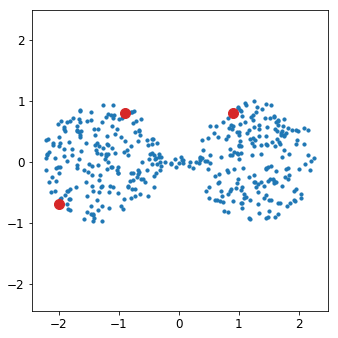

In [250]:
ax = scprep.plot.scatter2d(data_left, c='tab:blue', figsize=(5.2, 4.8), s=10)
scprep.plot.scatter2d(data_right, ax=ax, c='tab:blue', s=10)
scprep.plot.scatter2d(data_join, ax=ax, c='tab:blue', s=10)
scprep.plot.scatter2d(a, ax=ax, c='tab:red', s=100)
ax.set_ylim(ax.get_xlim())
plt.savefig("../img/barbell.png", dpi=300)

In [251]:
np.sqrt(np.sum((a[0] - a[1])**2))

1.8601075237738274

In [252]:
np.sqrt(np.sum((a[0] - a[2])**2))

1.8

In [253]:
data = np.vstack([a, data_join, data_left, data_right])

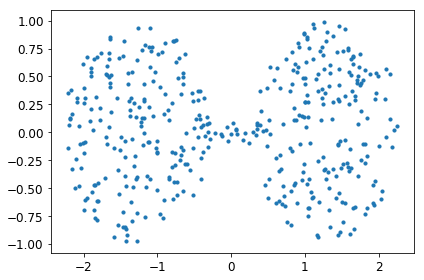

In [254]:
scprep.plot.scatter2d(data)

In [255]:
G = graphtools.Graph(data, knn=5, decay=None)

/usr/lib/python3.7/site-packages/scipy/sparse/lil.py:518: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not x.flags.writeable:


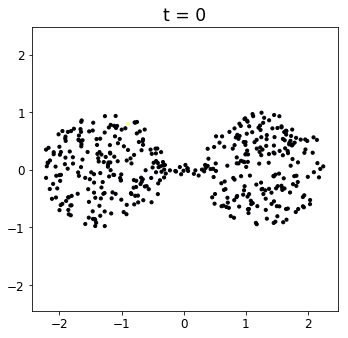

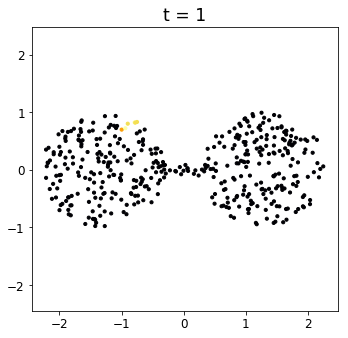

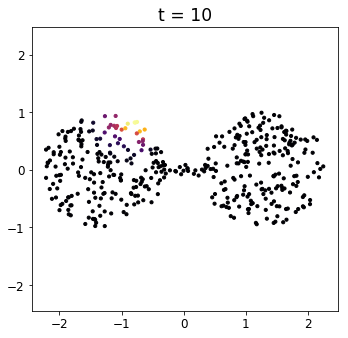

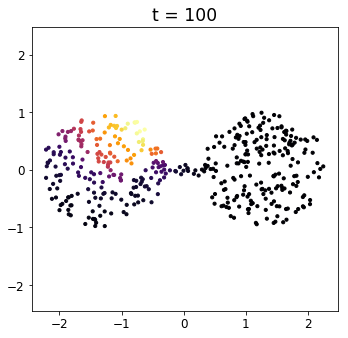

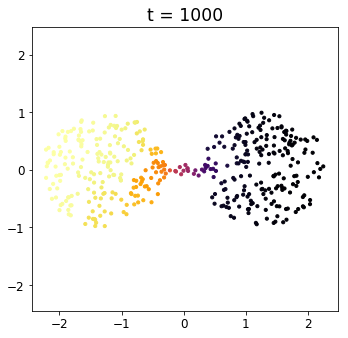

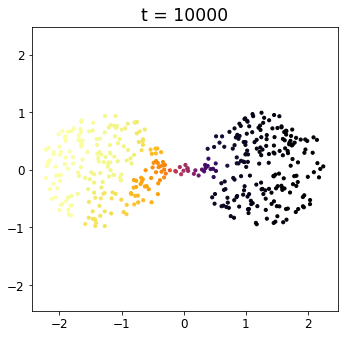

In [256]:
from scipy import sparse
s = sparse.lil_matrix((G.K.shape[0], 1))
i = 0
s[0] = 1
p0 = []
ts = [0, 1, 10, 100, 1000, 10000]
for t in ts:
    while i < t:
        s = G.P @ s
        i += 1
    ax = scprep.plot.scatter2d(data, c=s, title="t = {}".format(t), discrete=False, figsize=(5.2, 4.8), legend=False)
    ax.set_ylim(ax.get_xlim())
    plt.savefig("../img/barbell_diffusion_a0_{}.png".format(t), dpi=300)
    p0.append(s)

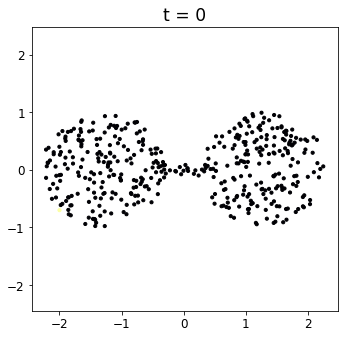

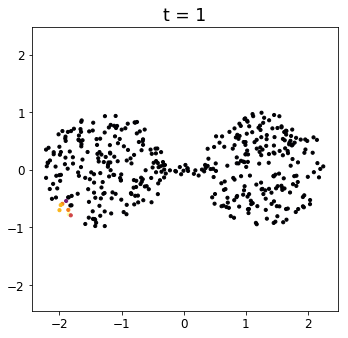

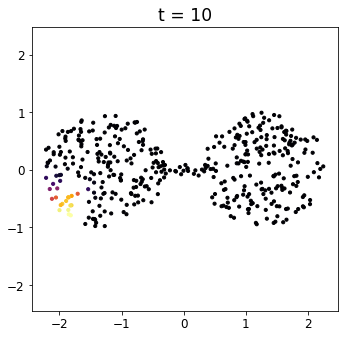

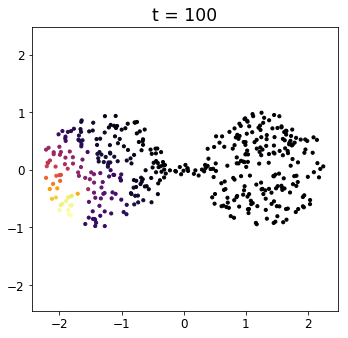

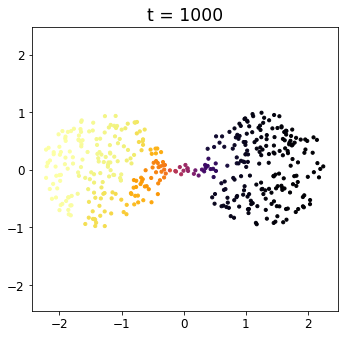

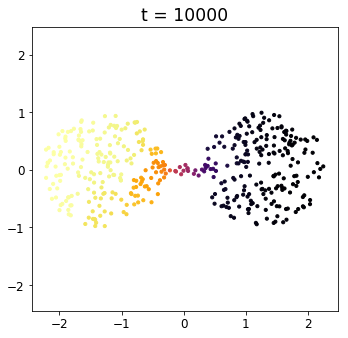

In [257]:
s = sparse.lil_matrix((G.K.shape[0], 1))
i = 0
s[1] = 1
p1 = []
for t in ts:
    while i < t:
        s = G.P @ s
        i += 1
    ax = scprep.plot.scatter2d(data, c=s, title="t = {}".format(t), discrete=False, figsize=(5.2, 4.8), legend=False)
    ax.set_ylim(ax.get_xlim())
    plt.savefig("../img/barbell_diffusion_a1_{}.png".format(t), dpi=300)
    p1.append(s)

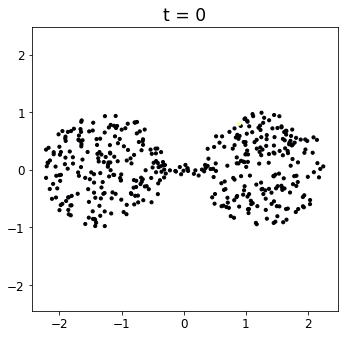

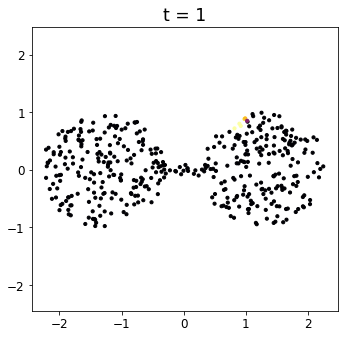

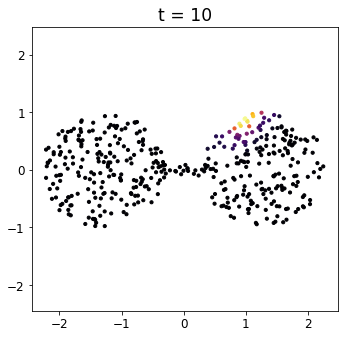

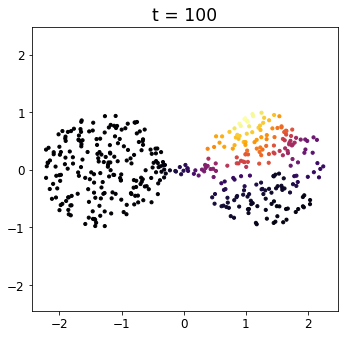

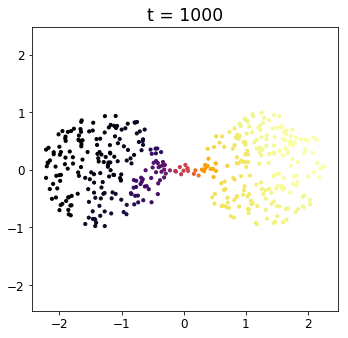

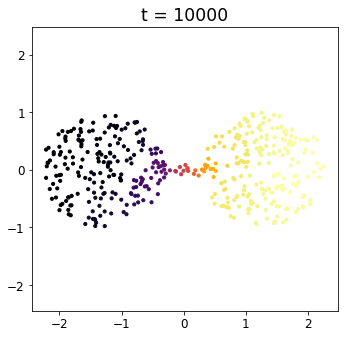

In [258]:
s = sparse.lil_matrix((G.K.shape[0], 1))
i = 0
s[2] = 1
p2 = []
for t in ts:
    while i < t:
        s = G.P @ s
        i += 1
    ax = scprep.plot.scatter2d(data, c=s, title="t = {}".format(t), discrete=False, figsize=(5.2, 4.8), legend=False)
    ax.set_ylim(ax.get_xlim())
    plt.savefig("../img/barbell_diffusion_a2_{}.png".format(t), dpi=300)
    p2.append(s)

In [259]:
for i, t in enumerate(ts):
    print(t, np.sqrt(np.sum((p0[i] - p1[i]).toarray() ** 2)), np.sqrt(np.sum((p0[i] - p2[i]).toarray() ** 2)))

0 1.4142135623730951 1.4142135623730951
1 0.5678741147265755 0.5700189593973723
10 0.3060772615600332 0.2772124030992092
100 0.1256684054718594 0.12223598485987816
1000 0.0031099097349379396 0.06615546349776216
10000 0.00010852962189940112 0.004670701052587978


In [260]:
import m_phate

In [261]:
dm = m_phate.kernel.DM(G)

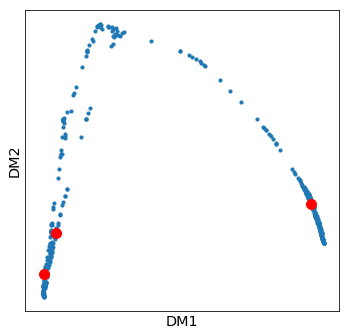

In [268]:
ax = scprep.plot.scatter2d(dm, figsize=(5.2, 4.8))
scprep.plot.scatter2d(dm[:3], s=100, c='red', ticks=False, label_prefix="DM",
                      ax=ax, filename="../img/barbell_dm.png", dpi=300)